In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
health_file_path = "Resources/HNPQEXCEL.xlsx"


In [3]:
# Read the health and nutrition study results
health_metadata = pd.read_excel(health_file_path)
health_metadata.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Total fertility rate (TFR) (births per woman)...,SP.DYN.TFRT.Q1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.3,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Total fertility rate (TFR) (births per woman)...,SP.DYN.TFRT.Q2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.4,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Total fertility rate (TFR) (births per woman)...,SP.DYN.TFRT.Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Total fertility rate (TFR) (births per woman)...,SP.DYN.TFRT.Q4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.3,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Total fertility rate (TFR) (births per woman)...,SP.DYN.TFRT.Q5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Cleanup dataset for the desired columns and indictaors
specific_columns_health_metadata = health_metadata[["Country Name","Country Code","Indicator Name","2013","2014","2015","2016","2017"]] 


In [5]:
cleaned_health_metadata = specific_columns_health_metadata.dropna()

In [34]:
list_of_countries = cleaned_health_metadata["Country Name"].unique()
list_of_indicator_name = cleaned_health_metadata["Indicator Name"].unique()
list_of_quintile = ["Q1","Q2","Q3","Q4","Q5"]

In [7]:
list_of_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia',
       'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Chad', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', "Cote d'Ivoire", 'Dominican Republic',
       'Egypt, Arab Rep.', 'El Salvador', 'Eswatini', 'Ethiopia', 'Gabon',
       'Gambia, The', 'Georgia', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kyrgyz Republic', 'Lao PDR', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Maldives', 'Mali', 'Mauritania', 'Mexico', 'Moldova',
       'Mongolia', 'Montenegro', 'Mozambique', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan',
       'Panama', 'Paraguay', 'Peru', 'Philippines', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Serbi

In [7]:
list_of_indicator_name

array(['People practicing open defecation (% of population): Q1 (lowest)',
       'People practicing open defecation (% of population): Q2',
       'People practicing open defecation (% of population): Q3',
       'People practicing open defecation (% of population): Q4',
       'People practicing open defecation (% of population): Q5 (highest)',
       'People practicing open defecation, rural (% of rural population): Q1 (lowest)',
       'People practicing open defecation, rural (% of rural population): Q2',
       'People practicing open defecation, rural (% of rural population): Q3',
       'People practicing open defecation, rural (% of rural population): Q4',
       'People practicing open defecation, rural (% of rural population): Q5 (highest)',
       'People practicing open defecation, urban (% of urban population): Q1 (lowest)',
       'People practicing open defecation, urban (% of urban population): Q2',
       'People practicing open defecation, urban (% of urban populatio

In [8]:
# Senegal country has all the necesity records for the given indicators
country_senegal_df = cleaned_health_metadata.loc[cleaned_health_metadata["Country Name"] == "Senegal"]


country_senegal_df.head()


,Country Name,Country Code,Indicator Name,2013,2014,2015,2016,2017
70140,Senegal,SEN,Total fertility rate (TFR) (births per woman)...,7.7,7.3,7.3,7.1,6.7
70141,Senegal,SEN,Total fertility rate (TFR) (births per woman)...,6.4,6.3,6.2,6.2,5.9
70142,Senegal,SEN,Total fertility rate (TFR) (births per woman)...,5.6,5.2,5.0,4.3,5.0
70143,Senegal,SEN,Total fertility rate (TFR) (births per woman)...,4.1,4.1,4.0,3.5,3.6
70144,Senegal,SEN,Total fertility rate (TFR) (births per woman)...,3.8,3.4,2.8,3.4,3.0


In [35]:
# Data to collect for each Indicator Name Quater and populate in the dataframe
open_defecation_Q1 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation (% of population): Q1 (lowest)",:]
open_defecation_Q2 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation (% of population): Q2",:]
open_defecation_Q3 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation (% of population): Q3",:]
open_defecation_Q4 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation (% of population): Q4",:]
open_defecation_Q5 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation (% of population): Q5 (highest)",:]

open_defecation_df = [open_defecation_Q1,open_defecation_Q2,open_defecation_Q3,open_defecation_Q4,open_defecation_Q5]

final_open_defecation_df = pd.concat(open_defecation_df)
final_open_defecation_df['Quintile'] = list_of_quintile
final_open_defecation_df

,Country Name,Country Code,Indicator Name,2013,2014,2015,2016,2017,Quintile
70345,Senegal,SEN,People practicing open defecation (% of popula...,46.84080,46.02305,45.20530,44.38755,43.56981,Q1
70346,Senegal,SEN,People practicing open defecation (% of popula...,26.53785,25.50196,24.46607,23.43018,22.39428,Q2
70347,Senegal,SEN,People practicing open defecation (% of popula...,6.45794,5.39663,4.33532,3.27401,2.21269,Q3
70348,Senegal,SEN,People practicing open defecation (% of popula...,0.79710,0.65798,0.51887,0.37975,0.24064,Q4
70349,Senegal,SEN,People practicing open defecation (% of popula...,0.06230,0.04153,0.02077,0.00000,0.00000,Q5


In [36]:
# Data to collect for each Indicator Name Quater and populate in the dataframe for rural
open_defecation_rural_Q1 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, rural (% of rural population): Q1 (lowest)",:]
open_defecation_rural_Q2 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, rural (% of rural population): Q2",:]
open_defecation_rural_Q3 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, rural (% of rural population): Q3",:]
open_defecation_rural_Q4 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, rural (% of rural population): Q4",:]
open_defecation_rural_Q5 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, rural (% of rural population): Q5 (highest)",:]

open_defecation_rural_df = [open_defecation_rural_Q1,open_defecation_rural_Q2,open_defecation_rural_Q3,open_defecation_rural_Q4,open_defecation_rural_Q5]

final_open_defecation_rural_df = pd.concat(open_defecation_rural_df)
final_open_defecation_rural_df['Quintile'] = list_of_quintile
final_open_defecation_rural_df

,Country Name,Country Code,Indicator Name,2013,2014,2015,2016,2017,Quintile
70350,Senegal,SEN,"People practicing open defecation, rural (% of...",50.45667,49.86245,49.26824,48.67403,48.07981,Q1
70351,Senegal,SEN,"People practicing open defecation, rural (% of...",41.75102,40.83676,39.92251,39.00825,38.09399,Q2
70352,Senegal,SEN,"People practicing open defecation, rural (% of...",28.36629,27.46669,26.56709,25.66749,24.76789,Q3
70353,Senegal,SEN,"People practicing open defecation, rural (% of...",12.46504,11.01186,9.55869,8.10551,6.65234,Q4
70354,Senegal,SEN,"People practicing open defecation, rural (% of...",1.20250,0.47624,0.00000,0.00000,0.00000,Q5


In [37]:
# Data to collect for each Indicator Name Quater and populate in the dataframe for urban
open_defecation_urban_Q1 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, urban (% of urban population): Q1 (lowest)",:]
open_defecation_urban_Q2 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, urban (% of urban population): Q2",:]
open_defecation_urban_Q3 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, urban (% of urban population): Q3",:]
open_defecation_urban_Q4 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, urban (% of urban population): Q4",:]
open_defecation_urban_Q5 = country_senegal_df.loc[country_senegal_df["Indicator Name"] == "People practicing open defecation, urban (% of urban population): Q5 (highest)",:]

open_defecation_urban_df = [open_defecation_urban_Q1,open_defecation_urban_Q2,open_defecation_urban_Q3,open_defecation_urban_Q4,open_defecation_urban_Q5]

final_open_defecation_urban_df = pd.concat(open_defecation_urban_df)
final_open_defecation_urban_df['Quintile'] = list_of_quintile
final_open_defecation_urban_df

,Country Name,Country Code,Indicator Name,2013,2014,2015,2016,2017,Quintile
70355,Senegal,SEN,"People practicing open defecation, urban (% of...",8.03322,7.68096,7.32870,6.97645,6.62419,Q1
70356,Senegal,SEN,"People practicing open defecation, urban (% of...",1.28751,1.23538,1.18324,1.13111,1.07898,Q2
70357,Senegal,SEN,"People practicing open defecation, urban (% of...",0.72778,0.74839,0.76899,0.78960,0.81021,Q3
70358,Senegal,SEN,"People practicing open defecation, urban (% of...",0.04758,0.03970,0.03181,0.02393,0.01605,Q4
70359,Senegal,SEN,"People practicing open defecation, urban (% of...",0.03977,0.04323,0.04669,0.05015,0.05360,Q5


In [38]:
open_defecation_agg_df = final_open_defecation_df.groupby(["Country Name"])[["2013","2014","2015","2016","2017"]].agg(['mean','median','var','std','sem'])
open_defecation_agg_df




2013                                                2014  \
                   mean   median         var        std       sem      mean   
Country Name                                                                  
Senegal       16.139198  6.45794  409.573426  20.237921  9.050673  15.52423   

                                                        ...       2016  \
               median         var        std       sem  ...       mean   
Country Name                                            ...              
Senegal       5.39663  398.255197  19.956332  8.924743  ...  14.294298   

                                                             2017           \
               median         var        std       sem       mean   median   
Country Name                                                                 
Senegal       3.27401  377.114126  19.419427  8.684632  13.683484  2.21269   

                                               
                     var        std       sem  
Country Name                                   
Senegal       367.149338  19.161141  8.569123  

[1 rows x 25 columns]

In [42]:
merged_open_defecation_df = pd.merge(pd.merge(final_open_defecation_df,final_open_defecation_rural_df,on='Quintile'),final_open_defecation_urban_df,on='Quintile')
merged_open_defecation_df


,Country Name_x,Country Code_x,Indicator Name_x,2013_x,2014_x,2015_x,2016_x,2017_x,Quintile,Country Name_y,...,2016_y,2017_y,Country Name,Country Code,Indicator Name,2013,2014,2015,2016,2017
0,Senegal,SEN,People practicing open defecation (% of popula...,46.84080,46.02305,45.20530,44.38755,43.56981,Q1,Senegal,...,48.67403,48.07981,Senegal,SEN,"People practicing open defecation, urban (% of...",8.03322,7.68096,7.32870,6.97645,6.62419
1,Senegal,SEN,People practicing open defecation (% of popula...,26.53785,25.50196,24.46607,23.43018,22.39428,Q2,Senegal,...,39.00825,38.09399,Senegal,SEN,"People practicing open defecation, urban (% of...",1.28751,1.23538,1.18324,1.13111,1.07898
2,Senegal,SEN,People practicing open defecation (% of popula...,6.45794,5.39663,4.33532,3.27401,2.21269,Q3,Senegal,...,25.66749,24.76789,Senegal,SEN,"People practicing open defecation, urban (% of...",0.72778,0.74839,0.76899,0.78960,0.81021
3,Senegal,SEN,People practicing open defecation (% of popula...,0.79710,0.65798,0.51887,0.37975,0.24064,Q4,Senegal,...,8.10551,6.65234,Senegal,SEN,"People practicing open defecation, urban (% of...",0.04758,0.03970,0.03181,0.02393,0.01605
4,Senegal,SEN,People practicing open defecation (% of popula...,0.06230,0.04153,0.02077,0.00000,0.00000,Q5,Senegal,...,0.00000,0.00000,Senegal,SEN,"People practicing open defecation, urban (% of...",0.03977,0.04323,0.04669,0.05015,0.05360


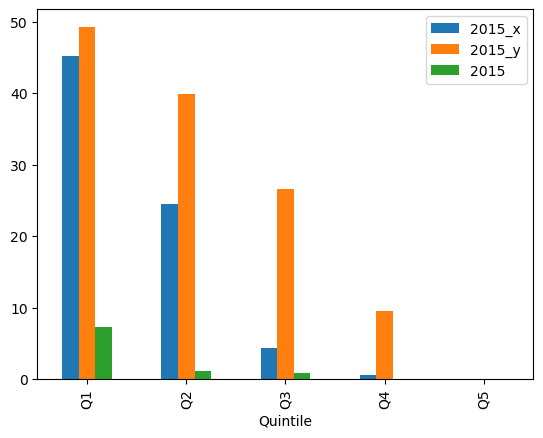

In [47]:
merged_open_defecation_df.plot.bar(x="Quintile", y=["2015_x","2015_y","2015"])
plt.show()
plt.close()